In [145]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import logomaker
import hdf5plugin
import h5py    

In [146]:
!ls test_finemo/

hits.bed  hits.tsv  hits_unique.tsv  parameters.json  peaks_qc.tsv


In [147]:
hits_unique = pd.read_csv("test_finemo/hits_unique.tsv",sep="\t")

In [168]:
celltype = 'enterocytes'
fold = 'fold_0'
NARROWPEAK_SCHEMA = ["chr", "start", "end", "peak_name", "2", "3", "4", "5", "6", "summit"]

regions_df = pd.read_csv("celltype_models_human/modelv1_enterocytes/fold_0/output/auxiliary/interpret_subsample/chrombpnet_nobias.interpreted_regions.bed", sep='\t', names=NARROWPEAK_SCHEMA)

seq_length = 2114
regions_df['int_start'] = regions_df['start']+regions_df['summit']-seq_length/2
regions_df['int_end'] = regions_df['start']+regions_df['summit']+seq_length/2



In [169]:
regions_df

,chr,start,end,peak_name,2,3,4,5,6,summit,int_start,int_end
0,chr12,109899995,109900702,human_peaks_peak_21522,401,.,8.63842,42.9638,40.1651,257,109899195.0,109901309.0
1,chr1,120069320,120069699,human_peaks_peak_5033,178,.,8.43747,20.2290,17.8344,330,120068593.0,120070707.0
2,chr4,48668552,48669474,human_peaks_peak_61270,239,.,6.25034,26.4993,23.9753,295,48667790.0,48669904.0
3,chr2,160407008,160408230,human_peaks_peak_46710,411,.,8.04573,43.9424,41.1290,870,160406821.0,160408935.0
4,chr4,77189989,77190495,human_peaks_peak_61877,216,.,8.51536,24.0781,21.6019,250,77189182.0,77191296.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,chr8,127586018,127586672,human_peaks_peak_82420,365,.,8.87889,39.3238,36.5807,364,127585325.0,127587439.0
29996,chr6,30006093,30007472,human_peaks_peak_70466,183,.,5.43551,20.7532,18.3474,374,30005410.0,30007524.0
29997,chr19,13589156,13589517,human_peaks_peak_39966,167,.,8.13613,19.1458,16.7758,273,13588372.0,13590486.0
29998,chr14,105086785,105087205,human_peaks_peak_27297,123,.,2.94911,14.6310,12.3752,176,105085904.0,105088018.0


In [149]:
h5_file = 'celltype_models_human/modelv1_enterocytes/fold_0/output/auxiliary/interpret_subsample/chrombpnet_nobias.profile_scores.h5'

In [150]:
def get_model_score(file_path,sequence_number):
    import h5py
    # Open the HDF5 file
    with h5py.File(file_path, 'r') as f:
        # Access the dataset
        dataset = f['shap']['seq']
        
        # Convert dataset to a pandas DataFrame
        #get contribution_scores
        df = pd.DataFrame(dataset[sequence_number][:])
    
        # Access the dataset
        dataset = f['raw']['seq']
        
        # Convert dataset to a pandas DataFrame
        #get sequence
        df2 = pd.DataFrame(dataset[sequence_number][:])
    df3 = df*df2

    return(df3)
        

In [132]:
peak_scores = get_model_score(h5_file,i)
seq_df = peak_scores.T
seq_df.columns = ['A','C','G','T']

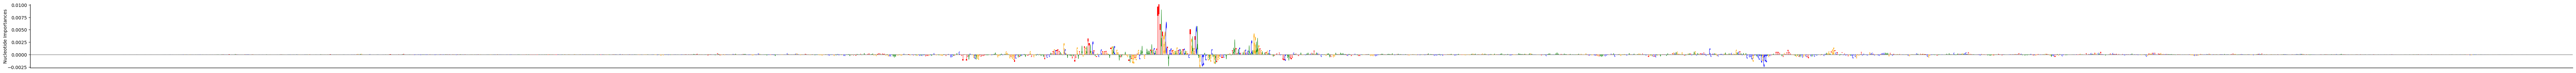

In [133]:
# create Logo object
import logomaker

crp_logo = logomaker.Logo(seq_df,figsize=(100, 2.5),
                          shade_below=0,
                          fade_below=0)

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
#crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)
crp_logo.ax.set_xticks([])

# style using Axes methods
crp_logo.ax.set_ylabel("Nucleotide Importances", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)


In [138]:
hits_unique_pattern = hits_pattern.loc[hits_pattern['peak_id']==i].copy()


In [139]:
hits_unique_pattern

,chr,start,end,start_untrimmed,end_untrimmed,motif_name,hit_coefficient,hit_correlation,hit_importance,strand,peak_name,peak_id
63790,NaN,380,388,372,402,pos_patterns.pattern_5,182.83653,0.919142,0.020442,+,NaN,10227


In [155]:
seq_df = x_score.T
seq_df.columns = ['A','C','G','T']

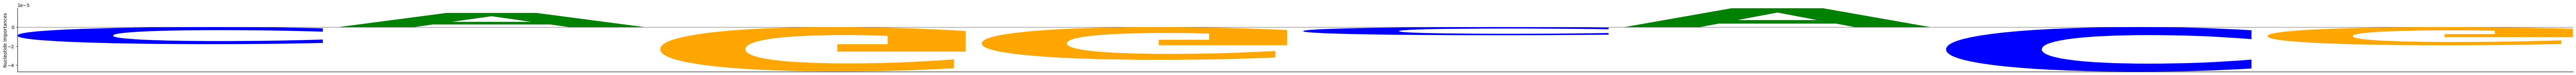

In [135]:
# create Logo object
import logomaker

crp_logo = logomaker.Logo(seq_df,figsize=(100, 2.5),
                          shade_below=0,
                          fade_below=0)

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
#crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)
crp_logo.ax.set_xticks([])

# style using Axes methods
crp_logo.ax.set_ylabel("Nucleotide Importances", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)


In [154]:
list(set(hits_pattern['peak_id']))

[8203,
 8204,
 12301,
 28706,
 12337,
 50,
 28723,
 14394,
 12347,
 22607,
 82,
 4185,
 16479,
 14434,
 26726,
 18535,
 2152,
 14440,
 28777,
 22638,
 14447,
 26734,
 131,
 2180,
 26770,
 6293,
 150,
 4247,
 26811,
 16580,
 12486,
 12487,
 28873,
 10448,
 16595,
 14549,
 10454,
 16600,
 2279,
 2291,
 10495,
 14596,
 2311,
 26890,
 26896,
 16658,
 24852,
 282,
 26909,
 10529,
 8483,
 18723,
 12582,
 12591,
 4402,
 18743,
 20793,
 18746,
 4411,
 12605,
 28990,
 2367,
 4416,
 6475,
 12627,
 12629,
 29017,
 24922,
 18779,
 8540,
 29020,
 8544,
 26979,
 10599,
 371,
 10611,
 16780,
 24974,
 8602,
 411,
 20893,
 4510,
 24992,
 27053,
 22960,
 25009,
 18866,
 29107,
 22965,
 25013,
 455,
 4553,
 16848,
 466,
 25046,
 8672,
 29155,
 2534,
 16873,
 498,
 12786,
 29171,
 25082,
 20988,
 29184,
 29185,
 8711,
 12811,
 12817,
 18963,
 23059,
 21013,
 27156,
 4632,
 18982,
 23082,
 19008,
 14919,
 14924,
 589,
 14931,
 23125,
 14946,
 29283,
 23155,
 10873,
 8830,
 6784,
 27264,
 644,
 10887,
 2727

In [152]:
i = 10
peak_scores = get_model_score(h5_file,i)
hits_unique_pattern = hits_pattern.loc[hits_pattern['peak_id']==i].copy()


In [ ]:
peak_scores

In [166]:
hits_unique_pattern['']

,chr,start,end,start_untrimmed,end_untrimmed,motif_name,hit_coefficient,hit_correlation,hit_importance,strand,peak_name,peak_id
34515,chr4,150252517,150252525,150252509,150252539,pos_patterns.pattern_5,164.34744,0.904828,0.005014,+,human_peaks_peak_63604,8203


In [156]:
pattern = 'pos_patterns.pattern_5'
hits_pattern = hits_unique.loc[hits_unique['motif_name']==pattern].copy()
#hits_pattern = hits_pattern[hits_pattern['hit_importance']>0.1]

hits_pattern = hits_pattern[hits_pattern['hit_coefficient']>100]


In [165]:
region

,chr,start,end,1,2,3,4,5,6,summit,int_start,int_end
0,chr12,109899995,109900702,human_peaks_peak_21522,401,.,8.63842,42.9638,40.1651,257,109899195.0,109901309.0
1,chr1,120069320,120069699,human_peaks_peak_5033,178,.,8.43747,20.2290,17.8344,330,120068593.0,120070707.0
2,chr4,48668552,48669474,human_peaks_peak_61270,239,.,6.25034,26.4993,23.9753,295,48667790.0,48669904.0
3,chr2,160407008,160408230,human_peaks_peak_46710,411,.,8.04573,43.9424,41.1290,870,160406821.0,160408935.0
4,chr4,77189989,77190495,human_peaks_peak_61877,216,.,8.51536,24.0781,21.6019,250,77189182.0,77191296.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,chr8,127586018,127586672,human_peaks_peak_82420,365,.,8.87889,39.3238,36.5807,364,127585325.0,127587439.0
29996,chr6,30006093,30007472,human_peaks_peak_70466,183,.,5.43551,20.7532,18.3474,374,30005410.0,30007524.0
29997,chr19,13589156,13589517,human_peaks_peak_39966,167,.,8.13613,19.1458,16.7758,273,13588372.0,13590486.0
29998,chr14,105086785,105087205,human_peaks_peak_27297,123,.,2.94911,14.6310,12.3752,176,105085904.0,105088018.0


150251444.0

In [180]:
x_start-150251444

1073

In [184]:
pattern = 'pos_patterns.pattern_5'
hits_pattern = hits_unique.loc[hits_unique['motif_name']==pattern].copy()
#hits_pattern = hits_pattern[hits_pattern['hit_importance']>0.1]

hits_pattern = hits_pattern[hits_pattern['hit_coefficient']>100]

start_name,end_name = 'start_untrimmed','end_untrimmed'
start_name,end_name = 'start','end'

start_name,end_name = 'start_untrimmed','end_untrimmed'
start_name,end_name = 'start','end'

j = 0
for i in list(set(hits_pattern['peak_id'])):
    peak_scores = get_model_score(h5_file,i)
    hits_unique_pattern = hits_pattern.loc[hits_pattern['peak_id']==i].copy()
    x_score = 0
    if len(hits_unique_pattern.index)>0:
        for x in hits_unique_pattern.index:
            x_start, x_end,x_strand, x_peak  = hits_unique_pattern.loc[x,start_name],hits_unique_pattern.loc[x,end_name],hits_unique_pattern.loc[x,'strand'], hits_unique_pattern.loc[x,'peak_name']
            
            peak_start = list(regions_df.loc[regions_df['peak_name']==x_peak,'int_start'])[0]
            x_start = int(x_start-peak_start)
            x_end = int(x_end-peak_start)
            
            if x_strand == '+':
                x_score = peak_scores.iloc[:,x_start:x_end]
            if x_strand == '-':
                x_score = peak_scores.iloc[:,x_start:x_end]
                x_score = x_score.loc[:, ::-1]
                                
            x_score.columns = range(0,x_end-x_start)
            
            if j == 0:
                pattern_summary = x_score
                j+=1
            else:
                pattern_summary = pattern_summary + x_score
                j+=1

print(j)
seq_df = pattern_summary
seq_df = seq_df.astype('float')
seq_df = seq_df.T
seq_df.columns = ['A','C','G','T']
seq_df[seq_df<0]=0


387


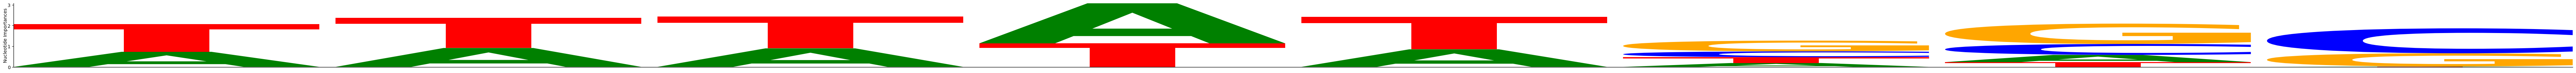

In [185]:
# create Logo object
import logomaker

crp_logo = logomaker.Logo(seq_df,figsize=(100, 2.5),
                          shade_below=0,
                          fade_below=0)

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
#crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)
crp_logo.ax.set_xticks([])

# style using Axes methods
crp_logo.ax.set_ylabel("Nucleotide Importances", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)


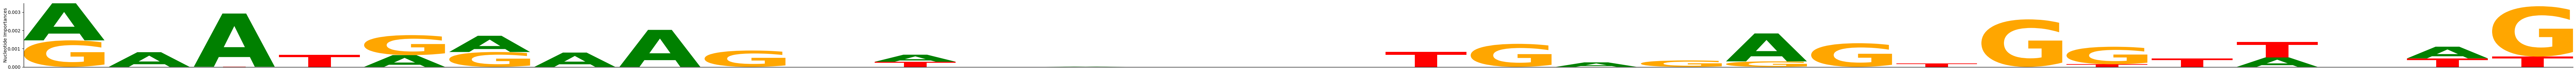

In [123]:
# create Logo object
import logomaker

crp_logo = logomaker.Logo(seq_df,figsize=(100, 2.5),
                          shade_below=0,
                          fade_below=0)

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
#crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)
crp_logo.ax.set_xticks([])

# style using Axes methods
crp_logo.ax.set_ylabel("Nucleotide Importances", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)


In [82]:
seq_df = pattern_summary
seq_df = seq_df.astype('float')
seq_df = seq_df.T
seq_df.columns = ['A','C','G','T']


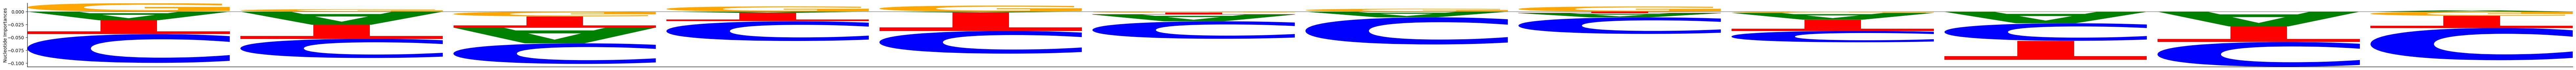

In [84]:
# create Logo object
import logomaker

crp_logo = logomaker.Logo(seq_df,figsize=(100, 2.5),
                          shade_below=0,
                          fade_below=0)

# style using Logo methods
crp_logo.style_spines(visible=False)
crp_logo.style_spines(spines=['left', 'bottom'], visible=True)
#crp_logo.style_xticks(rotation=90, fmt='%d', anchor=0)
crp_logo.ax.set_xticks([])

# style using Axes methods
crp_logo.ax.set_ylabel("Nucleotide Importances", labelpad=-1)
crp_logo.ax.xaxis.set_ticks_position('none')
crp_logo.ax.xaxis.set_tick_params(pad=-1)


In [37]:
pattern_summary

,0,1,2,3,4,5,6,7,8,9,10,11,12
A,0.000204,0.000240,0.000190,0.000135,0.000124,0.000088,0.000100,0.000200,0.000312,0.000151,0.000110,0.000426,0.000414
C,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000058,0.000098,-0.000000,0.000000,0.000155,0.000058,-0.000063,0.000085
G,0.000000,0.000007,0.000044,0.000188,0.000306,0.000088,0.000188,0.000306,0.000039,0.000000,0.000115,0.000000,0.000000
T,0.000730,0.000579,0.000623,0.000791,0.000731,0.000249,0.000082,0.000131,0.000000,0.000145,0.000000,-0.000000,0.000163


In [34]:
x_score

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.000047,0.000088,0.000000,0.00000,-0.000000,-0.000000,-0.000000,-0.000000,0.000088,0.000079,-0.000063,0.000125,-0.000000
1,-0.000000,-0.000000,-0.000000,-0.00000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000085
2,0.000000,0.000000,-0.000000,-0.00000,-0.000000,-0.000000,0.000188,0.000306,-0.000000,0.000000,-0.000000,-0.000000,0.000000
3,-0.000000,0.000000,0.000373,0.00073,0.000579,0.000249,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000


,chr,start,end,start_untrimmed,end_untrimmed,motif_name,hit_coefficient,hit_correlation,hit_importance,strand,peak_name,peak_id
0,NaN,450,463,442,472,pos_patterns.pattern_0,124.476180,0.748580,0.008012,-,NaN,0
1,NaN,675,682,660,690,pos_patterns.pattern_2,0.424009,0.694288,0.000813,-,NaN,0
2,NaN,521,529,508,538,pos_patterns.pattern_14,4.264839,0.670180,0.001604,-,NaN,1
3,NaN,551,560,542,572,pos_patterns.pattern_4,254.780260,0.942259,0.006522,+,NaN,1
4,NaN,579,588,570,600,pos_patterns.pattern_4,3.422394,0.666826,0.001746,+,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186605,NaN,546,554,538,568,pos_patterns.pattern_5,6.784205,0.641825,0.054364,+,NaN,29999
186606,NaN,605,617,596,626,pos_patterns.pattern_6,7.288223,0.668961,0.045656,+,NaN,29999
186607,NaN,690,697,681,711,neg_patterns.pattern_1,3.296811,0.764825,0.021672,-,NaN,29999
186608,NaN,710,717,701,731,neg_patterns.pattern_1,0.481433,0.707278,0.012226,-,NaN,29999


In [ ]:
region_name = 'SLC5A12_regions'
celltype = 'enterocytes'
fold = 'fold_0'
NARROWPEAK_SCHEMA = ["chr", "start", "end", "1", "2", "3", "4", "5", "6", "summit"]

regions_df = pd.read_csv('region_scores/'+celltype+'/'+region_name+"/"+fold+".interpreted_regions.bed", sep='\t', names=NARROWPEAK_SCHEMA)

seq_length = 2114
regions_df['int_start'] = regions_df['start']+regions_df['summit']-seq_length/2
regions_df['int_end'] = regions_df['start']+regions_df['summit']+seq_length/2

